***Quantile***

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./csvs/heights.csv")
df

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
9,imran,14.5


In [3]:
max_height = df["height"].quantile(0.95)

In [4]:
df[df["height"]> max_height]

,name,height
9,imran,14.5


In [5]:
min_height = df["height"].quantile(0.05)

In [6]:
df[df["height"] <min_height]

,name,height
12,yoseph,1.2


In [7]:
df[(df["height"]< max_height) & (df["height"] > min_height)]

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
10,jose,6.1


*****Quantile 2******

In [8]:
df = pd.read_csv("./csvs/ab_nyc.csv")
df.sample(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
46139,35108156,"Luxury & Bright 2BR, Midtown Manhattan",180960990,Ethan,Manhattan,Hell's Kitchen,40.75971,-73.99256,Entire home/apt,445,2,1,2019-06-09,1.00,1,60
18089,14163324,Williamsburg Studio w/ Roof Deck and Gym,15061780,Nikki,Brooklyn,Williamsburg,40.71973,-73.94272,Entire home/apt,100,2,3,2016-11-14,0.09,1,0
46645,35356745,New York City - Walking from Central Park,153434419,Rachel,Manhattan,Harlem,40.81433,-73.94255,Private room,75,5,1,2019-06-14,1.00,3,246
22384,18077042,CLEAN! Executive Studio Suite. Entire apt w/pv...,121093001,Geoffrey,Queens,Ozone Park,40.67574,-73.85601,Entire home/apt,81,3,96,2019-06-22,3.59,1,233
15070,12019589,House On Henry Parlor Apartment,11481,Annette,Brooklyn,Carroll Gardens,40.67890,-74.00117,Entire home/apt,180,4,5,2019-05-08,0.13,3,333


In [9]:
df["price_per_night"] = df["price"] / df["minimum_nights"]

In [10]:
df.sample(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_per_night
10903,8409246,Charming East Village Garden Apt.,3266068,Alex,Manhattan,East Village,40.72625,-73.98173,Entire home/apt,235,3,4,2015-12-05,0.09,1,0,78.333333
26868,21305125,Cozy Basement lounge Apt inCambria Heights,154184894,Mike,Queens,Cambria Heights,40.69358,-73.73000,Private room,120,2,0,NaN,NaN,2,0,60.000000
12898,9821370,"Elegant, sunny and spacious room in Harlem",50588394,Alizé,Manhattan,Harlem,40.82391,-73.93881,Private room,80,1,28,2018-11-04,0.72,1,364,80.000000


In [11]:
mini , maxi = df["price_per_night"].quantile([0.05 , 0.985])

In [12]:
print(mini)
print(maxi)

3.3333333333333335
350.0


In [3]:
df = pd.read_csv("./csvs/bhp.csv")
df.sample(3)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
10903,Bannerghatta Road,3 BHK,1640.0,3.0,105.0,3,6402
12775,Ramamurthy Nagar,2 BHK,960.0,2.0,35.0,2,3645
9107,7th Phase JP Nagar,2 BHK,980.0,2.0,86.0,2,8775


In [4]:
df.shape

(13200, 7)

In [5]:
mini , maxi = df["price_per_sqft"].quantile([0.001 , 0.999])

In [6]:
print(mini)
print(maxi)

1366.184
50959.36200000098


In [7]:
import matplotlib.pyplot as plt

In [8]:
df["price_per_sqft"].min()

267

In [9]:
df["price_per_sqft"].max()

12000000

(array([1.3198e+04, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([2.67000000e+02, 1.20024030e+06, 2.40021360e+06, 3.60018690e+06,
        4.80016020e+06, 6.00013350e+06, 7.20010680e+06, 8.40008010e+06,
        9.60005340e+06, 1.08000267e+07, 1.20000000e+07]),
 <BarContainer object of 10 artists>)

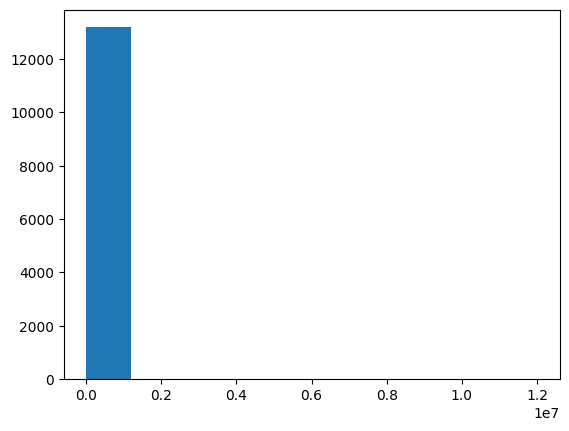

In [10]:
plt.hist(df["price_per_sqft"])

In [28]:
df2 = df[(df["price_per_sqft"]<maxi) & (df["price_per_sqft"]>mini)]
df2.shape

(13061, 7)

(array([1.3198e+04, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([2.67000000e+02, 1.20024030e+06, 2.40021360e+06, 3.60018690e+06,
        4.80016020e+06, 6.00013350e+06, 7.20010680e+06, 8.40008010e+06,
        9.60005340e+06, 1.08000267e+07, 1.20000000e+07]),
 <BarContainer object of 10 artists>)

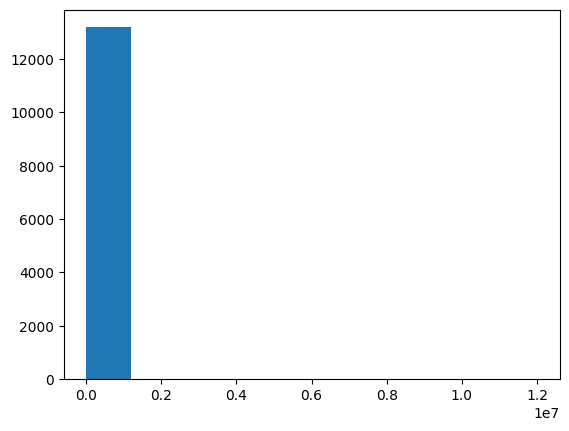

In [29]:
plt.hist(df["price_per_sqft"])

***STD***

In [30]:
maxi = df2["price_per_sqft"].mean() + 4*df2["price_per_sqft"].std()
mini = df2["price_per_sqft"].mean() - 4*df2["price_per_sqft"].std()

In [31]:
print(mini)
print(maxi)

-7519.319138720568
20405.94099003364


In [33]:
df3 = df2[(df2["price_per_sqft"] < maxi) & (df2["price_per_sqft"] > mini)]
df3.shape

(12975, 7)

***Z-SCORE***


In [34]:
df2["z_score"] = (df2["price_per_sqft"] - df2["price_per_sqft"].mean()) /df2["price_per_sqft"].std()

C:\Users\kulde\AppData\Local\Temp\ipykernel_1684\3332798630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["z_score"] = (df2["price_per_sqft"] - df2["price_per_sqft"].mean()) /df2["price_per_sqft"].std()


In [35]:
df3.sample(3)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
12531,Electronic City,1 BHK,589.0,1.0,29.0,1,4923
4095,Hoodi,3 BHK,1925.0,2.0,114.0,3,5922
11489,6th Phase JP Nagar,2 BHK,1192.0,2.0,75.0,2,6291


In [36]:
df4 = df2[(df2["z_score"] < 4) & (df2["z_score"] > -4)]
df4.shape

(12975, 8)

In [23]:
df4["price_per_sqft"].min()

1379

In [24]:
df4["price_per_sqft"].max()

20357

***IQR***

In [15]:
df = pd.read_csv("./csvs/height_weight.csv")
df.sample(4)

,gender,height,weight
7333,Female,67.151338,156.302307
9786,Female,63.583680,128.219617
4101,Male,68.629931,184.289729
9659,Female,62.417973,131.349766


In [7]:
Q1 = df["height"].quantile(0.25)
Q3 = df["height"].quantile(0.75)
Q1 , Q3

(63.505620481218955, 69.1742617268347)

In [6]:
IQR = Q3-Q1
IQR

5.668641245615746

In [9]:
min_height = Q1 - 1.5*IQR
max_height = Q3 + 1.5*IQR
min_height , max_height

(55.00265861279534, 77.67722359525831)

In [16]:
df[(df.height < min_height) | (df.height > max_height) ]

,gender,height,weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127
